In [7]:
import csv

# Charger le fichier brut
file_path = 'data/catastrophes_naturelles_transformes.csv'
output_path = 'data/catastrophes_naturelles_sans_guillemets.csv'

# Lire le fichier et enlever les guillemets au début et à la fin des lignes
with open(file_path, 'r', encoding='utf-8') as f:
    raw_data = f.readlines()

# Traiter chaque ligne pour supprimer les guillemets et remplacer les virgules par des points-virgules
processed_data = []
for line in raw_data:
    # Si la ligne contient une liste (identifiée par des crochets)
    if '[' in line and ']' in line:
        # Remplacer la virgule entre les éléments de la liste par un point-virgule
        line = line.replace(', ', '; ')
    # Enlever tous les guillemets (simples et doubles) pour éviter tout problème de format
    line = line.replace('"', '').replace("'", '')  # Enlever les guillemets
    processed_data.append(line)

# Sauvegarder les données traitées dans un nouveau fichier sans guillemets et avec ; au lieu de virgules
with open(output_path, 'w', encoding='utf-8', newline='') as f:
    f.writelines(processed_data)

print(f"Les données traitées ont été sauvegardées dans : {output_path}")

# Charger le fichier CSV d'entrée sans guillemets
input_file_path = 'data/catastrophes_naturelles_transformes.csv'
output_file_path = 'data/catastrophes_naturelles_sans_guillemets.csv'

# Lire le fichier CSV sans guillemets
with open(input_file_path, mode='r', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)

    # Assurez-vous que les noms de colonnes sont corrects
    fieldnames = reader.fieldnames

    if fieldnames is None:
        raise ValueError("Les noms de colonnes ne sont pas présents dans le fichier CSV")

    # Vérifier les noms de colonnes pour s'assurer qu'ils sont propres
    print("Noms de colonnes trouvés :", fieldnames)

    # Préparer les données transformées
    rows = []
    for row in reader:
        # Vérifier que la ligne a bien toutes les colonnes nécessaires
        if set(row.keys()) != set(fieldnames):
            print("Erreur : La ligne suivante ne correspond pas aux noms de colonnes :", row)
            continue

        # Récupérer la valeur de la colonne "catastrophe"
        catastrophe_value = row['catastrophe']

        # Transformer la valeur selon les règles définies
        if catastrophe_value == 'aucun':
            row['catastrophe'] = '0'
        elif catastrophe_value == '[seisme]':
            row['catastrophe'] = '1'
        elif catastrophe_value == '[innondation]':
            row['catastrophe'] = '2'
        elif catastrophe_value == "[innondation; seisme]":
            row['catastrophe'] = '3'


        # Récupérer la valeur de la colonne "quartier"
        Zone_value = row['quartier']

        # Transformer la valeur selon les règles définies
        if Zone_value == 'Zone 1':
            row['quartier'] = '1'
        elif Zone_value == 'Zone 2':
            row['quartier'] = '3'
        elif Zone_value == 'Zone 3':
            row['quartier'] = '4'
        elif Zone_value == "Zone 4":
            row['quartier'] = '2'
        elif Zone_value == "Zone 5":
            row['quartier'] = '5'

        # Ajouter la ligne transformée
        rows.append(row)

# Sauvegarder les données transformées dans un nouveau fichier CSV
with open(output_file_path, mode='w', encoding='utf-8', newline='') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    # Vérifier si toutes les lignes ont les bonnes colonnes
    if not rows:
        raise ValueError("Aucune donnée valide à écrire dans le fichier.")

    # Écrire les en-têtes et les données transformées
    writer.writeheader()
    writer.writerows(rows)

print(f"Les données transformées ont été sauvegardées dans : {output_file_path}")


Les données traitées ont été sauvegardées dans : data/catastrophes_naturelles_sans_guillemets.csv
Noms de colonnes trouvés : ['ID', 'temperature', 'humidite', 'force_moyenne_du_vecteur_de_vent', 'force_du_vecteur_de_vent_max', 'pluie_intensite_max', 'date', 'quartier', 'sismicite', 'concentration_gaz', 'pluie_totale', 'catastrophe']
Les données transformées ont été sauvegardées dans : data/catastrophes_naturelles_sans_guillemets.csv


Importation des données

In [8]:
import pandas as pd
import os

# Vérification du chemin d'accès
file_path = 'data/catastrophes_naturelles_transformes.csv'
file_path_expanded = os.path.expanduser(file_path)

# Vérifier si le fichier existe
if os.path.exists(file_path_expanded):
    # Chargement du fichier CSV
    df = pd.read_csv(file_path_expanded)
    print(df.head())
else:
    print(f"Le fichier '{file_path_expanded}' n'existe pas.")

   ID  temperature  humidite  force_moyenne_du_vecteur_de_vent  \
0   0          5.7      75.6                               3.8   
1   0          5.7      75.6                               3.8   
2   1          5.7      75.6                               3.8   
3   1          5.7      75.6                               3.8   
4   2          5.7      75.6                               3.8   

   force_du_vecteur_de_vent_max  pluie_intensite_max        date  quartier  \
0                           4.3                  0.0  2170-01-01         1   
1                           4.3                  0.0  2170-01-01         1   
2                           4.3                  0.0  2170-01-01         2   
3                           4.3                  0.0  2170-01-01         2   
4                           4.3                  0.0  2170-01-01         3   

   sismicite  concentration_gaz  pluie_totale  catastrophe  
0       0.62             231.56        182.37            0  
1       0.62

In [9]:
df = df.drop(df.columns[[0, 6]], axis=1)
print(df.head())

   temperature  humidite  force_moyenne_du_vecteur_de_vent  \
0          5.7      75.6                               3.8   
1          5.7      75.6                               3.8   
2          5.7      75.6                               3.8   
3          5.7      75.6                               3.8   
4          5.7      75.6                               3.8   

   force_du_vecteur_de_vent_max  pluie_intensite_max  quartier  sismicite  \
0                           4.3                  0.0         1       0.62   
1                           4.3                  0.0         1       0.62   
2                           4.3                  0.0         2       0.94   
3                           4.3                  0.0         2       0.94   
4                           4.3                  0.0         3       0.95   

   concentration_gaz  pluie_totale  catastrophe  
0             231.56        182.37            0  
1             231.56        182.37            0  
2             

In [10]:
df.iloc[:, 1] = df.iloc[:, 1] / 100
print(df.head())

   temperature  humidite  force_moyenne_du_vecteur_de_vent  \
0          5.7     0.756                               3.8   
1          5.7     0.756                               3.8   
2          5.7     0.756                               3.8   
3          5.7     0.756                               3.8   
4          5.7     0.756                               3.8   

   force_du_vecteur_de_vent_max  pluie_intensite_max  quartier  sismicite  \
0                           4.3                  0.0         1       0.62   
1                           4.3                  0.0         1       0.62   
2                           4.3                  0.0         2       0.94   
3                           4.3                  0.0         2       0.94   
4                           4.3                  0.0         3       0.95   

   concentration_gaz  pluie_totale  catastrophe  
0             231.56        182.37            0  
1             231.56        182.37            0  
2             

Normalisation des données 

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Séparer la colonne 'catastrophe' des autres colonnes
features = df.drop(columns=['catastrophe'])
target = df['catastrophe']

# Réalisation d'un scale pour les amener à une échelle similaire
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Ajouter la colonne 'catastrophe' non modifiée
normalized_data_random_row = normalized_features.copy()
normalized_data_random_row['catastrophe'] = target

# Vérifier un aperçu des données normalisées
normalized_data_random_row.head()

,temperature,humidite,force_moyenne_du_vecteur_de_vent,force_du_vecteur_de_vent_max,pluie_intensite_max,quartier,sismicite,concentration_gaz,pluie_totale,catastrophe
0,0.465789,0.87237,0.086538,0.074653,0.0,0.00,0.457143,0.657992,0.182312,0
1,0.465789,0.87237,0.086538,0.074653,0.0,0.00,0.457143,0.657992,0.182312,0
2,0.465789,0.87237,0.086538,0.074653,0.0,0.25,0.914286,0.741267,0.903308,1
3,0.465789,0.87237,0.086538,0.074653,0.0,0.25,0.914286,0.741267,0.903308,1
4,0.465789,0.87237,0.086538,0.074653,0.0,0.50,0.928571,0.702983,0.363044,1


Matrice de corrélation

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


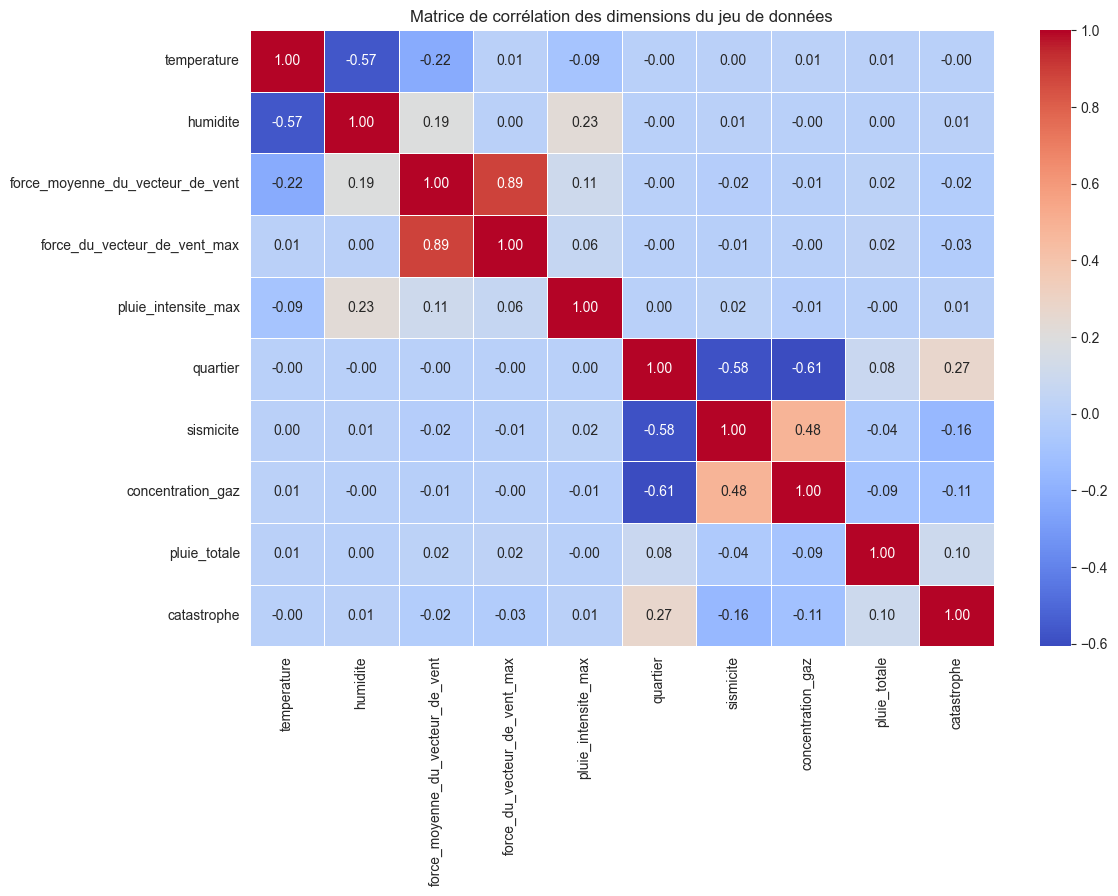

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Visualiser la matrice de corrélation avec Seaborn
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajouter un titre
plt.title("Matrice de corrélation des dimensions du jeu de données")

# Afficher la heatmap
plt.show()

Machine Learning

Modèle : Random Forest
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       551
           1       0.94      0.98      0.96       211
           2       0.92      0.97      0.95       494
           3       0.94      0.98      0.96       102

    accuracy                           0.95      1358
   macro avg       0.94      0.96      0.95      1358
weighted avg       0.95      0.95      0.95      1358

Modèle : K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.54      0.57      0.56       551
           1       0.50      0.61      0.55       211
           2       0.67      0.66      0.67       494
           3       0.65      0.24      0.35       102

    accuracy                           0.59      1358
   macro avg       0.59      0.52      0.53      1358
weighted avg       0.59      0.59      0.58      1358

Modèle : Decision Tree
              precision    recall  f1-score   sup

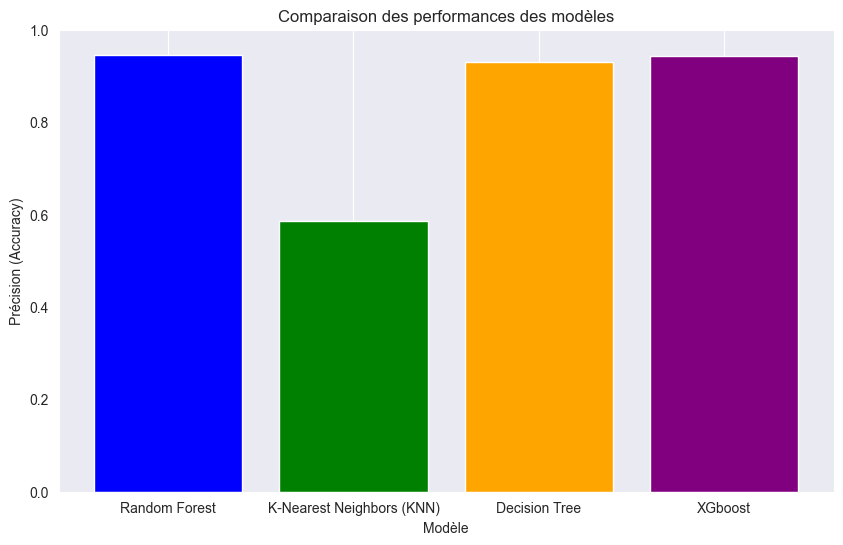

{'Random Forest': 0.9455081001472754,
 'K-Nearest Neighbors (KNN)': 0.585419734904271,
 'Decision Tree': 0.930780559646539,
 'XGboost': 0.9440353460972017}

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb


# Préparation des données
X = df.drop(columns=['catastrophe'])
y = df['catastrophe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des modèles
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42),
    "XGboost" :    xgb.XGBClassifier(n_estimators = 179, learning_rate= 0.19938380477723183, max_depth= 10, subsample= 0.6974169604519268, colsample_bytree= 0.6169828804734236, gamma= 0.050321171355875105, min_child_weight= 1, reg_alpha= 0.4500293330158086, reg_lambda= 0.638264258149184,random_state= 42)
}

# Dictionnaire pour stocker les performances des modèles
model_results = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)  # Entraînement
    y_pred = model.predict(X_test)  # Prédictions
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de la précision
    model_results[name] = accuracy  # Stocker le résultat
    print(f"Modèle : {name}")
    print(classification_report(y_test, y_pred))  # Rapport de classification

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Comparaison des performances des modèles")
plt.ylabel("Précision (Accuracy)")
plt.xlabel("Modèle")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

model_results
